In [1]:
---
  title: "EX 6"
  author: "Mohammad Farmani"
  format:
    html:
      embed-resources: true
  toc: true
  jupyter: python3
  ---

SyntaxError: invalid syntax (3213009102.py, line 1)

## Step 1: Setup and Data Preprocessing

- Start by importing the necessary libraries and load the spam.csv dataset.

- Preprocess the data by encoding categorical variables, defining features and target, and splitting the data into training and testing sets. Finally, apply PCA to reduce dimensionality.

In [15]:
# Import all required libraries
# Data handling and manipulation
import pandas as pd
import numpy as np

# Machine learning models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import mord as m
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Model evaluation and validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

# Metrics for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Utility for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

# For advanced visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

# Set Seaborn theme
sns.set_theme(style = "white")

In [36]:
# Import libraries


spam = pd.read_csv("data/spam.csv")

# Encode categorical variables
categorical_columns = spam.select_dtypes(include = ['object', 'category']).columns.tolist()
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    spam[col] = label_encoders[col].fit_transform(spam[col])

# Define features and target
X = spam.drop('yesno', axis = 1)
y = spam['yesno']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Reduce dimensionality
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


## Step 2: Model Training and Decision Boundary Visualization

- Train a Decision Tree classifier on the PCA-transformed training data.

- Implement and use the `decisionplot` function (from the lecture) to visualize the decision boundary of your trained model.

In [16]:
def decisionplot(model, X, y, resolution=216):
    # Split the data into features (X) and the class variable (y)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict outcomes for each point on the grid
    if isinstance(model, LinearDiscriminantAnalysis):
        # For LDA, we need to use the decision_function method
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if isinstance(model, LinearDiscriminantAnalysis):
    # Reshape LDA decision function output appropriately
        Z = Z.reshape(-1, 1)
    else:
        Z = Z.reshape(xx.shape)

    # Plot the actual data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', s=20)

    # Overlay the decision boundary
    plt.contourf(xx, yy, Z, alpha = 0.5)
    
    # Calculate the accuracy
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    
  
    # Set labels for axes
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()
    

/Users/mohammad/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


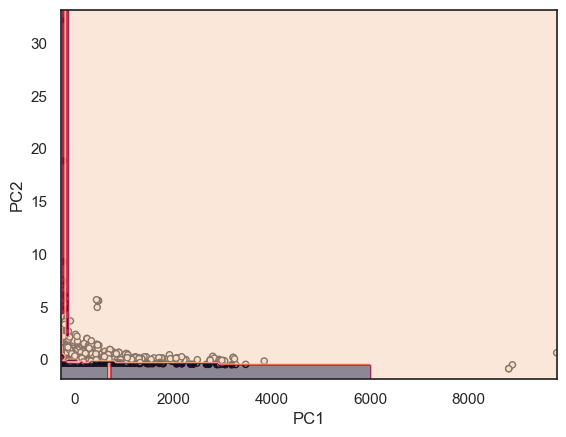

In [17]:
#| eval: false
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Train Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)

# Implement the decisionplot function (as provided in the lecture content)
# Add the decisionplot function here

# Visualize decision boundary
decisionplot(dtree, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)


## Step 3: Model Evaluation

- Evaluate your model using accuracy, precision, recall, F1 score, and AUC-ROC metrics.

In [19]:
#| eval: false
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Predictions
predictions = dtree.predict(X_test_pca)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average = 'weighted')
recall = recall_score(y_test, predictions, average = 'weighted')
f1 = f1_score(y_test, predictions, average = 'weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# For AUC-ROC, binarize the output and calculate AUC-ROC for each class
# Add the necessary code for AUC-ROC calculation here (refer to lecture content)

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81


In [43]:
y_test_binarized = label_binarize(y_test, classes = np.unique(y_train))
n_classes = y_test_binarized.shape[1]

# Get the probability predictions for each class
y_score = dtree.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate macro-average ROC-AUC
roc_auc_macro = np.mean(list(roc_auc.values()))
print(f"Macro-average ROC-AUC: {roc_auc_macro:.2f}")

# Calculate micro-average ROC-AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score[:,1].ravel())
roc_auc_micro = auc(fpr["micro"], tpr["micro"])
print(f"Micro-average ROC-AUC: {roc_auc_micro:.2f}")

Macro-average ROC-AUC: 0.23
Micro-average ROC-AUC: 0.77


## Assignment:
- Implement the missing parts of the code: the decisionplot function and AUC-ROC calculation.

- Discuss the results among your peers. Consider the following:

    - Which metric is most informative for this problem and why?

    - How does the decision boundary visualization help in understanding the model’s performance?

    - Reflect on the impact of PCA on model performance and decision boundary.



It seems AUC-ROC is the best metric, since all the others showing the same performance.


Visualizing the decision boundaries of a classification model offers a profound insight into its operational mechanics and performance. By delineating how the model distinguishes between different classes within the dataset, these visualizations serve multiple crucial purposes. They not only reveal the model's complexity and potential issues of overfitting or underfitting by showcasing the intricacy or simplicity of the boundaries but also facilitate the comparison between various models to identify the most suitable one for the task at hand. Additionally, decision boundary plots can uncover any biases in the model's learning, guiding improvements in feature engineering by highlighting areas where the model struggles to differentiate between classes effectively. This aids in enhancing the model's accuracy and generalizability. Moreover, such visual tools are invaluable for explaining the model's decision-making process to stakeholders, making complex machine learning concepts more accessible and understandable. Lastly, they can also signal data-related problems, like outliers or overlapping classes, which might necessitate further data preprocessing. In essence, decision boundary visualization is not just a diagnostic tool but a bridge between the technical and conceptual understanding of a model's performance and its underlying data structure.

## Effects of PCA

We do prediction without using the PCA 

In [44]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
predictions = dtree.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average = 'weighted')
recall = recall_score(y_test, predictions, average = 'weighted')
f1 = f1_score(y_test, predictions, average = 'weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


In [52]:
y_test_binarized = label_binarize(y_test, classes = np.unique(y_train))
n_classes = y_test_binarized.shape[1]

# Get the probability predictions for each class
y_score = dtree.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate macro-average ROC-AUC
roc_auc_macro = np.mean(list(roc_auc.values()))
print(f"Macro-average ROC-AUC: {roc_auc_macro:.2f}")

# Calculate micro-average ROC-AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score[:,1].ravel())
roc_auc_micro = auc(fpr["micro"], tpr["micro"])
print(f"Micro-average ROC-AUC: {roc_auc_micro:.2f}")


Macro-average ROC-AUC: 0.20
Micro-average ROC-AUC: 0.80


It seems without using the PCA the accuracy has been increased